# avereging filter

In [ ]:
import cv2
import os
import math
import numpy as np
import cv2
import glob

folder = r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\Resize Trained CNV"
k=1
for im in os.listdir(folder):  
    path = os.path.join(folder,im)
    img = cv2.imread(path,0)
    m, n = img.shape
    mask = np.ones([3, 3], dtype = int)
    mask = mask / 9
    img_new = np.zeros([m, n])
    for i in range(1, m-1):
        for j in range(1, n-1):
            temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
            img_new[i, j]= temp     

    img_new = img_new.astype(np.uint8)
    cv2.imwrite(os.path.join(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\AVG_Filter_OCT\CNV', 'after processing '+str(k)+'.jpeg'),img_new)
    k = k+1
print("success")

In [ ]:
img_src = cv2.imread(R'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\Resize Trained DRUSEN\image0.jpeg',0)
print(img_src)

[[255 254 255 ... 255 255 255]
 [255 255 254 ... 255 255 255]
 [251 255 255 ... 255 255 255]
 ...
 [ 16  22   9 ...   8   9  13]
 [ 20  19  17 ...   9   8  10]
 [ 22  10  15 ...  20  16  19]]


# Morphological Operation

In [ ]:
import numpy as np 
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 
import os 
import shutil 
from PIL import Image  
from PIL import Image,ImageEnhance 
from sewar import full_ref 
from skimage import metrics 
from skimage.metrics import structural_similarity as ssim 
%matplotlib inline

ModuleNotFoundError: ignored

# erosion

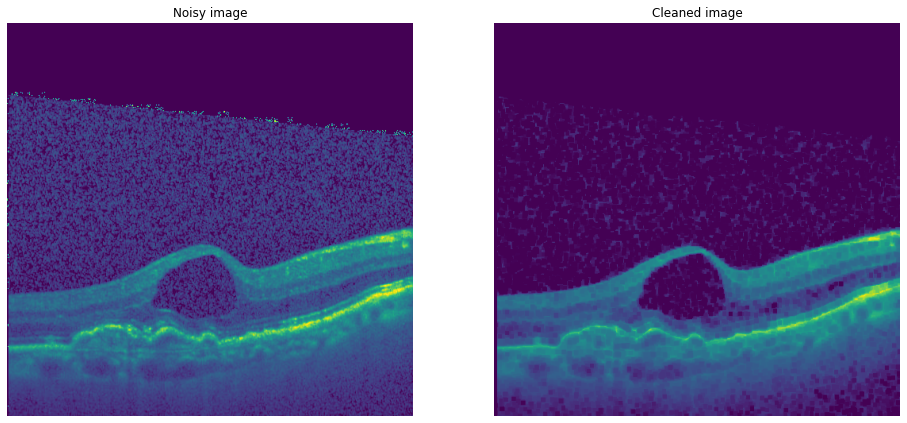

In [ ]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
img = cv.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)

cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_erosion\processed_image.png', erosion)
axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(erosion)


In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_erosion\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_erosion\processed_image.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_erosion\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_erosion\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_erosion\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_erosion\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  8.025228507749496
PSNR: based on scikit-image =  19.086229536549503
SSIM: based on scikit-image =  0.4507499114266007
RMSE: 2.8328834264313625


# Dilation

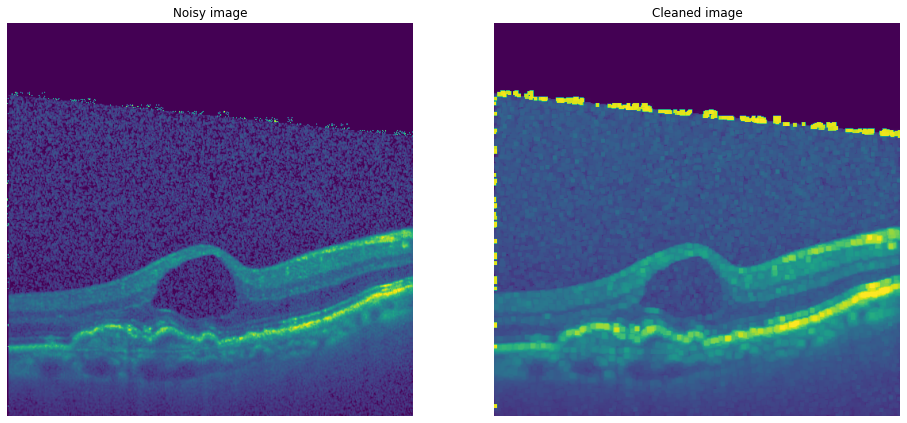

In [ ]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
img = cv.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv.dilate(img,kernel,iterations = 1)
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_dilation\processed_image.png', dilation)
axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(dilation)

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_dilation\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_dilation\processed_image.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_dilation\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_dilation\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_dilation\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_dilation\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  13.962443060105848
PSNR: based on scikit-image =  16.681189458262327
SSIM: based on scikit-image =  0.533124202950752
RMSE: 3.7366352591744687


# opening

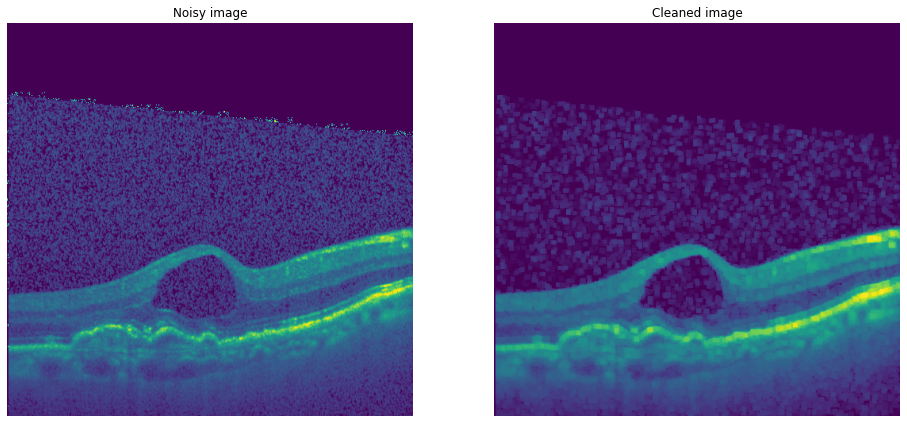

In [ ]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
img = cv.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg',0)
kernel = np.ones((5,5),np.uint8)
opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_opening\processed_image.png', opening)
axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(opening)

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_opening\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_opening\processed_image.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_opening\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_opening\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_opening\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_opening\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  4.122992534022178
PSNR: based on scikit-image =  21.978678124929175
SSIM: based on scikit-image =  0.6135102733380354
RMSE: 2.0305153370566247


# closing

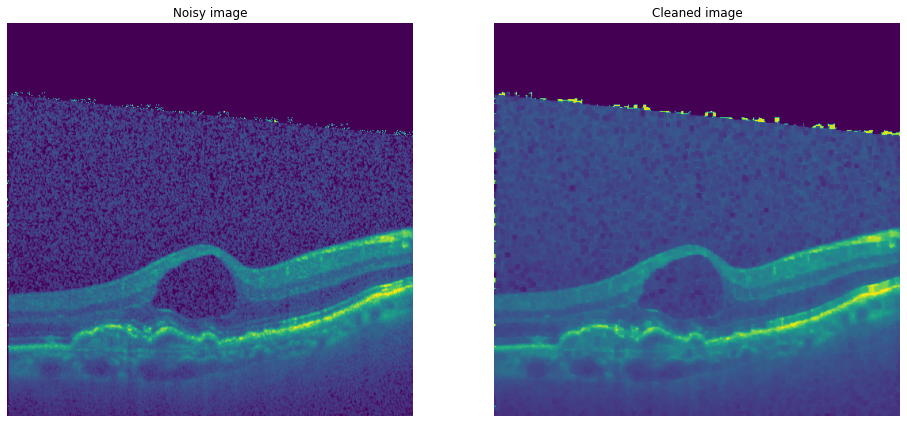

In [ ]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
img = cv.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg',0)
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\processed_image.png', closing)

axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(closing)

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\processed_image.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  4.518366541708669
PSNR: based on scikit-image =  21.580989017504866
SSIM: based on scikit-image =  0.6548052470801519
RMSE: 2.1256449707579743


# gradient

error: ignored

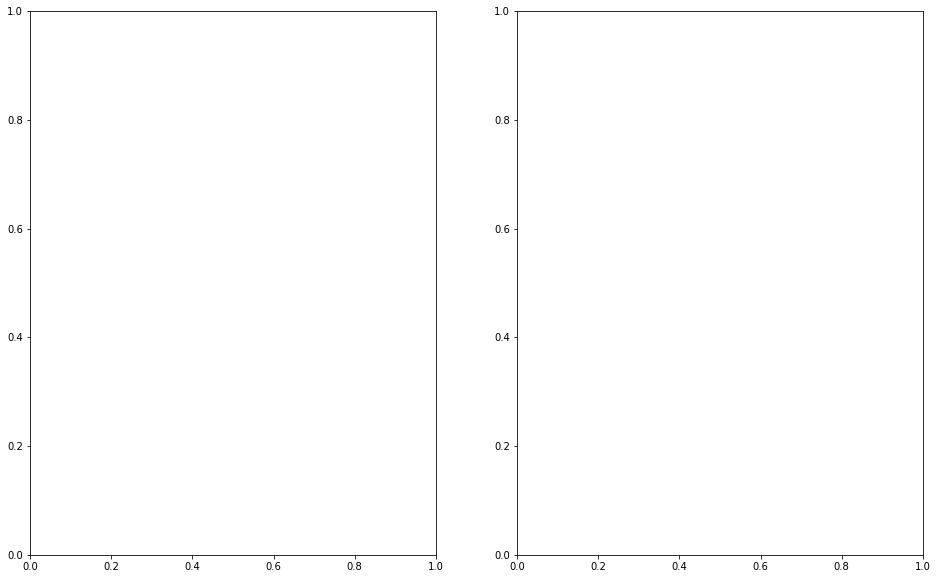

In [ ]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
img = cv.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg',0)
kernel = np.ones((5,5),np.uint8)
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_gradient\processed_image.png', gradient)

axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(gradient)

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_gradient\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_gradient\processed_image.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_gradient\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_gradient\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_gradient\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_gradient\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

# tophat

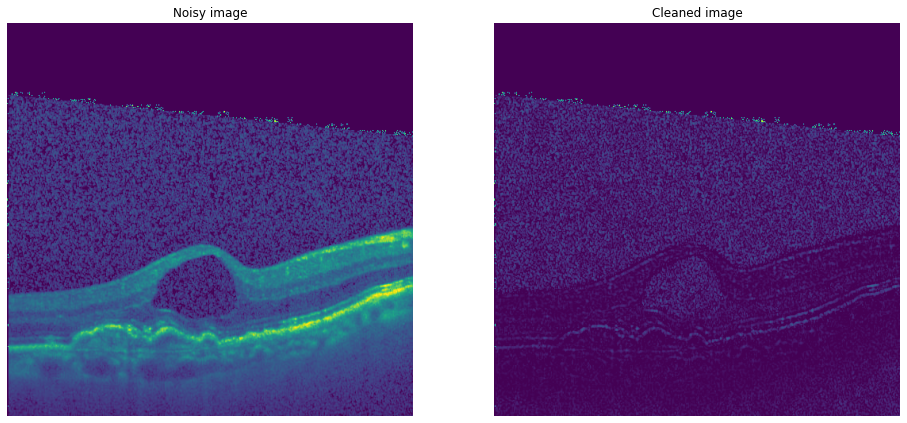

In [ ]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
img = cv.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg',0)
kernel = np.ones((5,5),np.uint8)
tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel)
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_tophat\processed_image.png', tophat)

axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(tophat)

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_tophat\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_tophat\processed_image.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_tophat\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_tophat\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_tophat\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_tophat\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  24.53302013766381
PSNR: based on scikit-image =  14.23329345544337
SSIM: based on scikit-image =  0.6061064412531135
RMSE: 4.953081882794167


# Morph blackhat

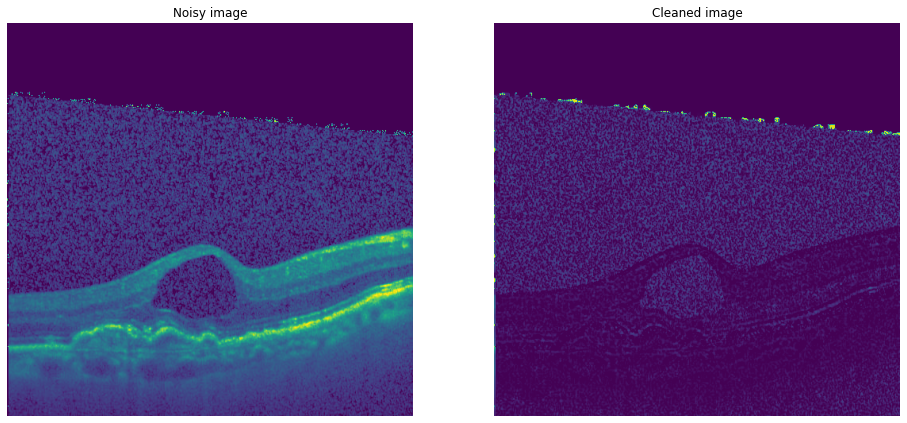

In [ ]:
import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
img = cv.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg',0)
kernel = np.ones((5,5),np.uint8)
blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel)
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_blackhat\processed_image.png', blackhat)
axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(blackhat)

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_blackhat\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_blackhat\processed_image.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_blackhat\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_blackhat\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_blackhat\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_blackhat\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  32.728331850113406
PSNR: based on scikit-image =  12.98156490810543
SSIM: based on scikit-image =  -0.05683575635193944
RMSE: 5.720868102841859


# Average

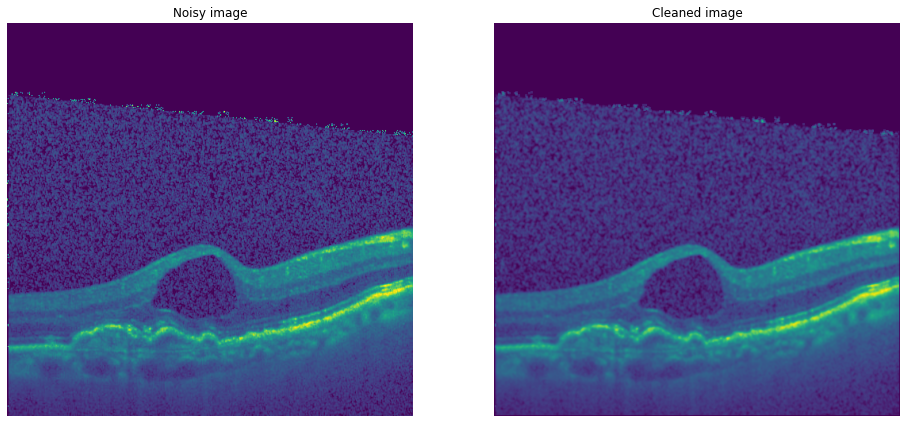

In [ ]:
 
import cv2
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
     
# Read the image
img = cv2.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg', 0)
 
# Obtain number of rows and columns
# of the image
m, n = img.shape
  
# Develop Averaging filter(3, 3) mask
mask = np.ones([3, 3], dtype = int)
mask = mask / 9
  
# Convolve the 3X3 mask over the image
img_new = np.zeros([m, n])
 
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = img[i-1, j-1]*mask[0, 0]+img[i-1, j]*mask[0, 1]+img[i-1, j + 1]*mask[0, 2]+img[i, j-1]*mask[1, 0]+ img[i, j]*mask[1, 1]+img[i, j + 1]*mask[1, 2]+img[i + 1, j-1]*mask[2, 0]+img[i + 1, j]*mask[2, 1]+img[i + 1, j + 1]*mask[2, 2]
        
        img_new[i, j]= temp
         
img_new = img_new.astype(np.uint8)
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\avg\processed_image.png', img_new)


axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(img_new)

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\avg\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\avg\processed_image.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\avg\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\avg\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\avg\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\avg\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  1.3322583795362903
PSNR: based on scikit-image =  26.884919003543402
SSIM: based on scikit-image =  0.8218550936732765
RMSE: 1.1542349758763553


# Median filter

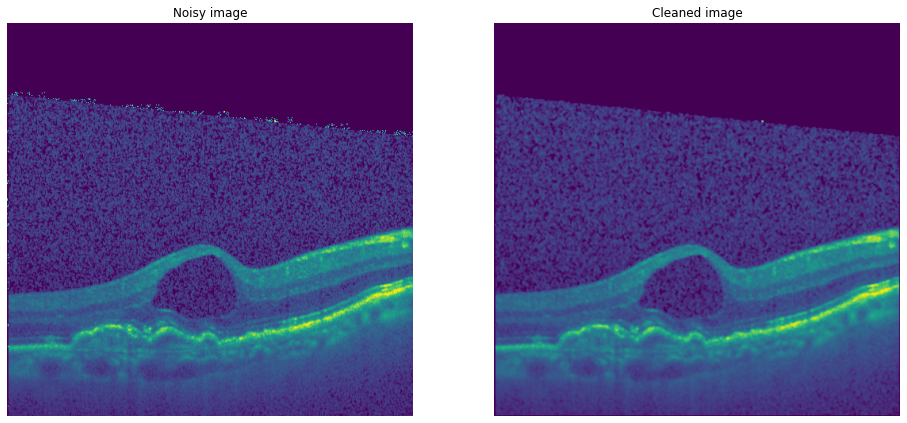

In [ ]:
import cv2
import numpy as np
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
     
# Read the image
img_noisy1 = cv2.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg', 0)
 
 
# Obtain the number of rows and columns
# of the image
m, n = img_noisy1.shape
  
# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new1 = np.zeros([m, n])
 
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img_noisy1[i-1, j-1],
               img_noisy1[i-1, j],
               img_noisy1[i-1, j + 1],
               img_noisy1[i, j-1],
               img_noisy1[i, j],
               img_noisy1[i, j + 1],
               img_noisy1[i + 1, j-1],
               img_noisy1[i + 1, j],
               img_noisy1[i + 1, j + 1]]
         
        temp = sorted(temp)
        img_new1[i, j]= temp[4]
 
img_new1 = img_new1.astype(np.uint8)
img_new = img_new.astype(np.uint8)
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\med\processed_image.png', img_new1)


axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img_noisy1)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(img_new1)

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\med\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\med\processed_image.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\med\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\med\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\med\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\med\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  1.4379173623361896
PSNR: based on scikit-image =  26.55346433174767
SSIM: based on scikit-image =  0.832946291625024
RMSE: 1.1991319203224429


# Mean Filter

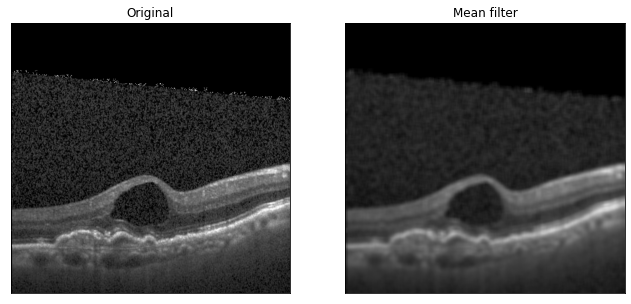

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image, ImageFilter
%matplotlib inline

image = cv2.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg') # reads the image
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # convert to HSV
figure_size = 9 # the dimension of the x and y axis of the kernal.
new_image = cv2.blur(image,(figure_size, figure_size))
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\mean\processed_image.png', img_new)


plt.figure(figsize=(11,6))
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_HSV2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_HSV2RGB)),plt.title('Mean filter')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\mean\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\mean\processed_image.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\mean\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\mean\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\mean\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\mean\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  1.3322583795362903
PSNR: based on scikit-image =  26.884919003543402
SSIM: based on scikit-image =  0.8218550936732765
RMSE: 1.1542349758763553


# biletarial

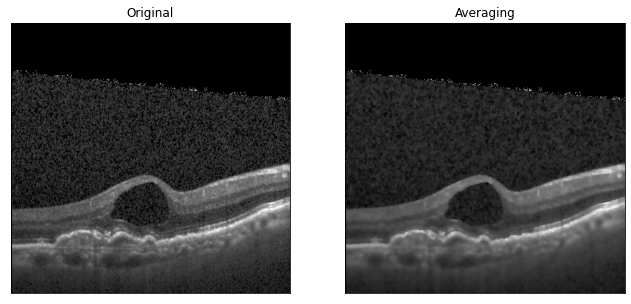

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg')
kernel = np.ones((5,5),np.float32)/25
blur = cv2.bilateralFilter(img,9,75,75)
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\biletarial\processed_image.png', blur)

plt.figure(figsize=(11,6))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\biletarial\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\biletarial\processed_image.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\biletarial\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\biletarial\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\biletarial\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\biletarial\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  0.5989005402595766
PSNR: based on scikit-image =  30.357256560127098
SSIM: based on scikit-image =  0.8251313908983035
RMSE: 0.7738866456139275


# Morph closing on biletarial filter

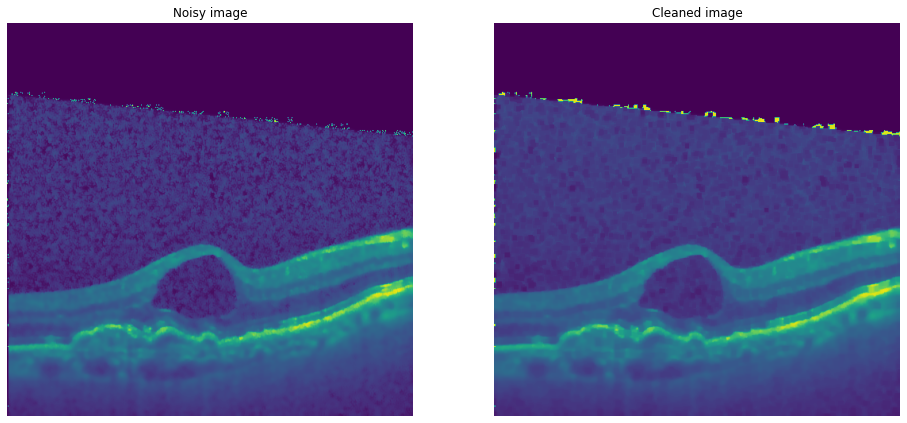

In [ ]:

import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
img = cv.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\biletarial\processed_image.png',0)
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\processed_image2.png', closing)

axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(closing)

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\biletarial\processed_image.png",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\processed_image2.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\bbbb\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\bbbb\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\bbbb\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\morph_closing\bbbb\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  1.6610736280871976
PSNR: based on scikit-image =  25.926914776258542
SSIM: based on scikit-image =  0.8560487556899737
RMSE: 1.2888264538281318


# Gaussian Blurring

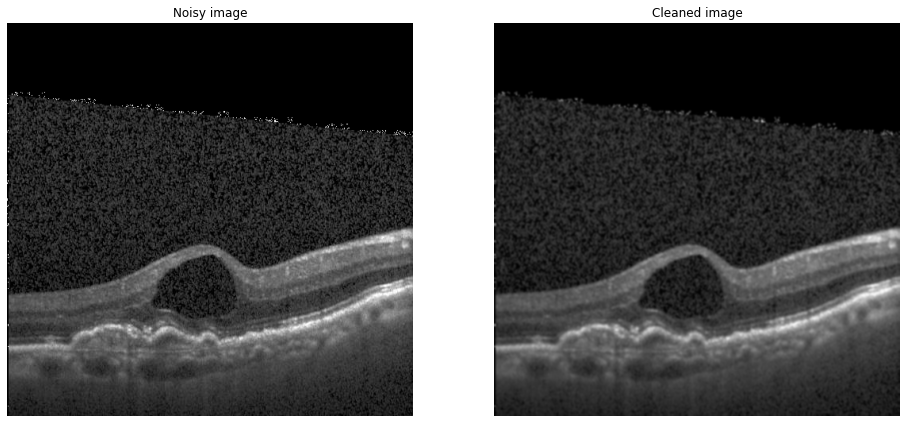

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
img = cv.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg')
blur = cv.GaussianBlur(img,(5,5),0)
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\gaussian blur\processed_image.png', closing)

axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(blur)

# Morph Closing on Gaussian Blur

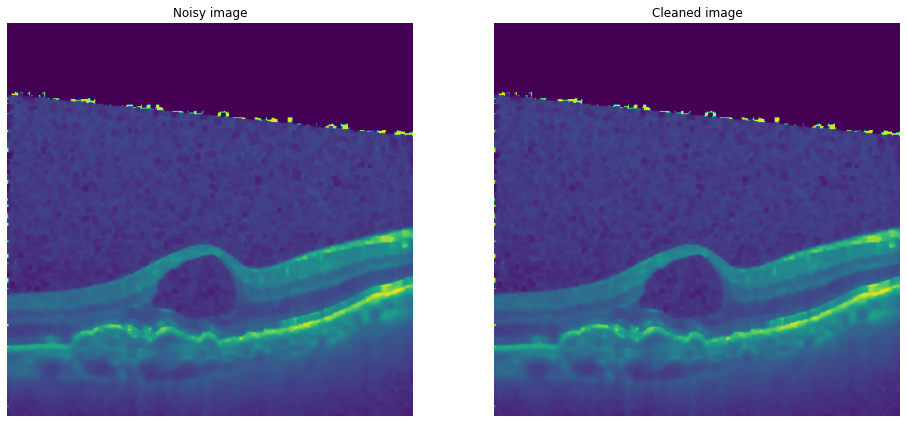

In [ ]:

import cv2 as cv
import numpy as np

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
img = cv.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\gaussian blur\processed_image.png',0)
kernel = np.ones((5,5),np.uint8)
closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)

cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\gaussian blur\processed_image2.png', closing)
fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(closing)

In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\gaussian blur\processed_image.png",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\gaussian blur\processed_image2.png",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\gaussian blur\aaaaa\a.png",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\gaussian blur\aaaaa\b.png",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\gaussian blur\aaaaa\a.png",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\gaussian blur\aaaaa\b.png",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  0.0
PSNR: based on scikit-image =  inf
SSIM: based on scikit-image =  1.0
RMSE: 0.0


# Non-local means denoising # 

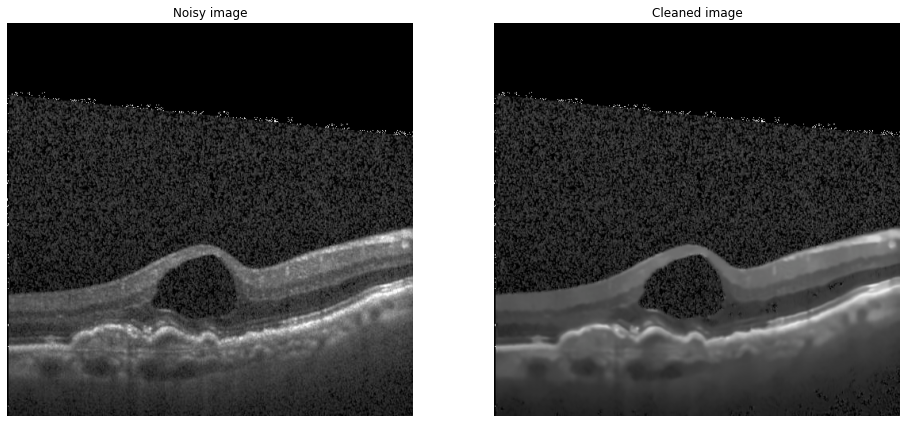

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\oct_without_border\CNV_border_remove\crop 3.jpeg')
b,g,r = cv2.split(img)           # get b,g,r
rgb_img = cv2.merge([r,g,b])     # switch it to rgb

# Denoising
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)

b,g,r = cv2.split(dst)           # get b,g,r
rgb_dst = cv2.merge([r,g,b])     # switch it to rgb
cv2.imwrite(r'C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\Non-local means denoising\processed_image2.jpeg', rgb_dst)


fig, axs = plt.subplots(1, 2, figsize=(16, 10))
axs = axs.ravel()
axs[0].axis('off')
axs[0].set_title('Noisy image')
axs[0].imshow(rgb_img)

axs[1].axis('off')
axs[1].set_title('Cleaned image')
axs[1].imshow(rgb_dst)


In [ ]:
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\Non-local means denoising\crop 3.jpeg",0) #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\Non-local means denoising\processed_image2.jpeg",0)  #noisy image 
 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\Non-local means denoising\bbb\a.jpeg",ref_img)  #save original image again 
cv2.imwrite(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\Non-local means denoising\bbb\b.jpeg",img)   #save noisy image again 
 
ref_img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\Non-local means denoising\bbb\a.jpeg",1)  #original image 
img = cv2.imread(r"C:\Users\SADIA SULTANA CHOWA\Downloads\oct new (2)\OCT DS\test filter images\Non-local means denoising\bbb\b.jpeg",1)  #noisy image 


mse_skimg = metrics.mean_squared_error(ref_img, img) 
print("MSE: based on scikit-image = ", mse_skimg/100) 
 
 
psnr_skimg = metrics.peak_signal_noise_ratio(ref_img, img, data_range=None) 
print("PSNR: based on scikit-image = ", psnr_skimg) 
 
ssim_skimg = ssim(ref_img, img, 
                  data_range = img.max() - img.min(),  
                  multichannel = True) 
print("SSIM: based on scikit-image = ", ssim_skimg)
rmse_f = np.sqrt(mse_skimg/100)
print("RMSE:", rmse_f)

MSE: based on scikit-image =  0.1833014112903226
PSNR: based on scikit-image =  35.49914552134608
SSIM: based on scikit-image =  0.9169361463015416
RMSE: 0.42813714075086107


# Total variable denoising

MSE: based on scikit-image =  36.68768531060988
PSNR: based on scikit-image =  12.485600486360966
SSIM: based on scikit-image =  0.14458524227048633
RMSE: 6.057036016948379